Elapsed time to compute the importances: 0.010 seconds
1.0
Selected features with importance >=0.04:
       Importance
bmi      0.050874
il5      0.048983
il4      0.044786
age      0.044136
il17a    0.042626
il9      0.042298
il7      0.042007
il13     0.041942
il6      0.041642
il21     0.040740
Number of selected features: 10


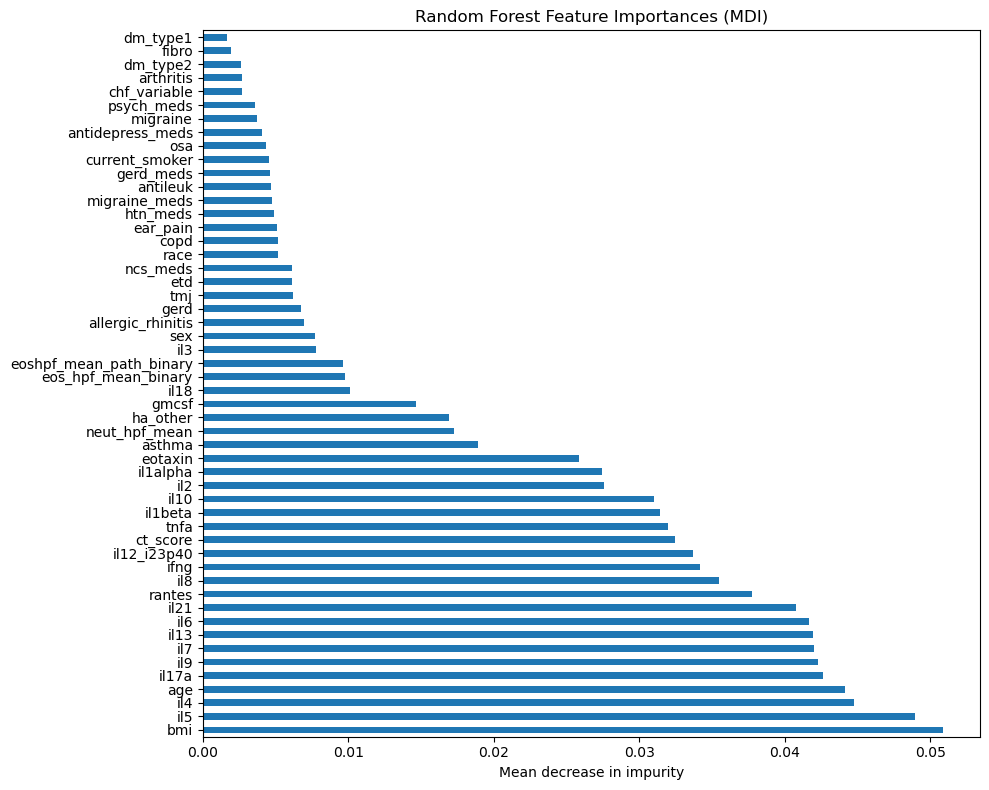

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import time
import matplotlib.pyplot as plt

# 读取数据文件
file_path = 'C:/Users/Administrator/Desktop/vandy3rd/Project/CR/Cytokine analysis for revision sinus surgery/Sep2024respositorydeID2.xlsx'
data = pd.read_excel(file_path, sheet_name='out-s2')

# 数据清理：删除 'prior_surgery' 中的缺失值
data_clean = data.dropna(subset=['prior_surgery'])

# 任务一：使用 IL1a 到 GMCSF 作为特征，考虑对 prior_surgery 的影响
X_task1 = data_clean.drop(columns=['phenotype', 'prior_surgery', 'number_prior_surgeries'])
y_task1 = data_clean['prior_surgery']

# 填充缺失值：将每列缺失值替换为列平均值
X_task1 = X_task1.apply(lambda col: col.fillna(col.mean()), axis=0)

# 标准化数据
scaler = StandardScaler()
X_task1 = pd.DataFrame(scaler.fit_transform(X_task1), columns=X_task1.columns)

# 定义特征和目标变量
features_task1 = X_task1.columns.tolist()

# 分割数据集为训练集和测试集
X_train_task1, X_test_task1, y_train_task1, y_test_task1 = train_test_split(
    X_task1, y_task1, stratify=y_task1, random_state=42, test_size=0.3
)

# 初始化随机森林分类器
forest_clf = RandomForestClassifier(random_state=0)

# 训练模型
forest_clf.fit(X_train_task1, y_train_task1)

# 计算基于MDI的特征重要性
start_time = time.time()
importances_task1 = forest_clf.feature_importances_
elapsed_time_task1 = time.time() - start_time

# 输出计算时间
print(f"Elapsed time to compute the importances: {elapsed_time_task1:.3f} seconds")

# 创建特征重要性DataFrame并排序（从大到小）
forest_importances_task1 = pd.DataFrame({'Importance': importances_task1}, index=X_task1.columns)
forest_importances_task1 = forest_importances_task1.sort_values(by='Importance', ascending=False)

print(forest_importances_task1['Importance'].sum())

# 计算累积重要性
#forest_importances_task1['Cumulative_Importance'] = forest_importances_task1['Importance'].cumsum()
#forest_importances_task1['Cumulative_Percentage'] = (
#    forest_importances_task1['Cumulative_Importance'] / forest_importances_task1['Importance'].sum()
#)

# 筛选出累积重要性 <= 80% 的特征
selected_features_task1 = forest_importances_task1[forest_importances_task1['Importance'] >= 0.04]

# 输出筛选后的特征
print("Selected features with importance >=0.04:")
print(selected_features_task1)

# 显示选取特征的数量
print(f"Number of selected features: {selected_features_task1.shape[0]}")

# 绘制横向的、经过排序的特征重要性图
plt.figure(figsize=(10, 8))
forest_importances_task1['Importance'].plot.barh(ax=plt.gca(), legend=False)
plt.title("Random Forest Feature Importances (MDI)")
plt.xlabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()



Elapsed time to compute the importances: 3.749 seconds
-0.29375
-0.29375
Selected features with cumulative importance <= 80%:
                         Importance       Std  Cumulative_Importance  \
il4                        0.032813  0.036611               0.032813   
rantes                     0.018750  0.022964               0.051562   
antileuk                   0.010937  0.007160               0.062500   
il1alpha                   0.009375  0.018750               0.071875   
bmi                        0.009375  0.017399               0.081250   
ifng                       0.009375  0.017399               0.090625   
migraine_meds              0.006250  0.007655               0.096875   
il21                       0.006250  0.021195               0.103125   
il9                        0.004687  0.010005               0.107812   
neut_hpf_mean              0.003125  0.009375               0.110937   
gerd                       0.003125  0.011693               0.114062   
migraine  

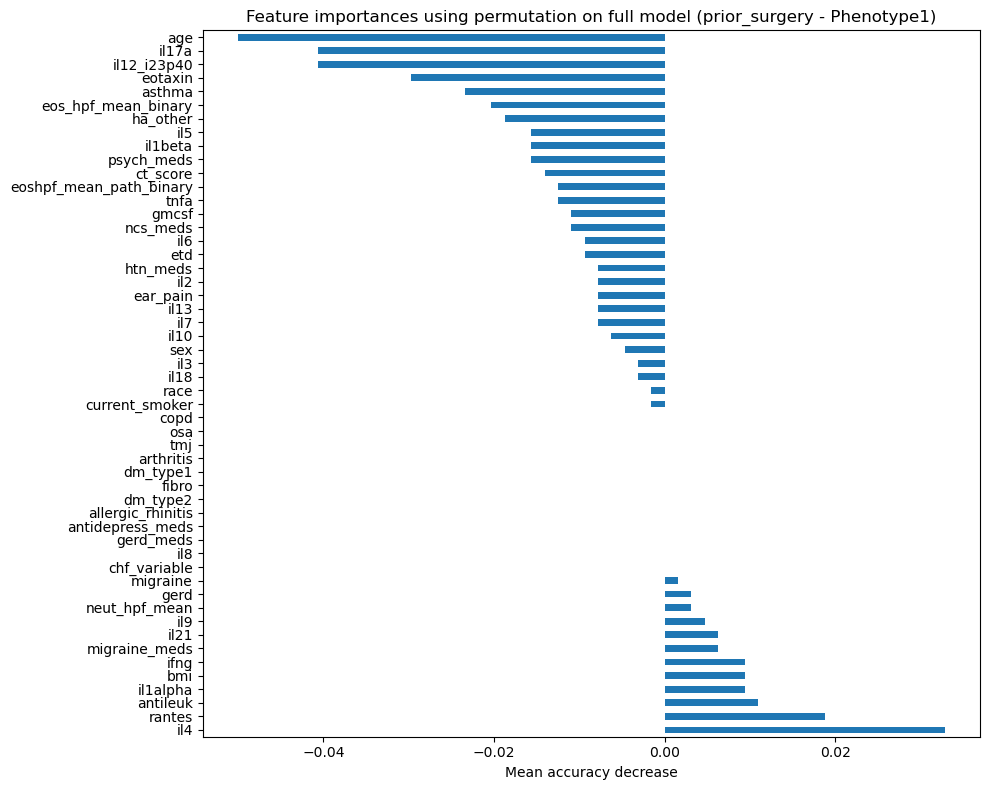

In [3]:
from sklearn.inspection import permutation_importance
# 计算基于特征置换的重要性
start_time = time.time()
result_task1 = permutation_importance(
    forest_clf, X_test_task1, y_test_task1, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time_task1_perm = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time_task1_perm:.3f} seconds")

# 创建基于置换的特征重要性 DataFrame 并从高到低排序
perm_importances_task1 = pd.DataFrame({
    'Importance': result_task1.importances_mean,
    'Std': result_task1.importances_std
}, index=features_task1)
perm_importances_task1 = perm_importances_task1.sort_values(by='Importance', ascending=False)

print(perm_importances_task1['Importance'].sum())

# 计算累积重要性
perm_importances_task1['Cumulative_Importance'] = perm_importances_task1['Importance'].cumsum()
perm_importances_task1['Cumulative_Percentage'] = (
    perm_importances_task1['Cumulative_Importance'] / perm_importances_task1['Importance'].sum()
)

print(perm_importances_task1['Importance'].sum())

# 筛选出累积重要性 <= 80% 的特征
selected_features_task1 = perm_importances_task1[perm_importances_task1['Cumulative_Percentage'] <= 0.8]

# 输出筛选后的特征
print("Selected features with cumulative importance <= 80%:")
print(selected_features_task1)

# 显示选取特征的数量
print(f"Number of selected features: {selected_features_task1.shape[0]}")

# 绘制横向的、经过排序的基于置换的特征重要性图
plt.figure(figsize=(10, 8))
perm_importances_task1['Importance'].plot.barh(ax=plt.gca(), legend=False)
plt.title("Feature importances using permutation on full model (prior_surgery - Phenotype1)")
plt.xlabel("Mean accuracy decrease")
plt.tight_layout()
plt.show()



Elapsed time to compute the importances: 0.005 seconds
0.9999999999999999
Selected features with importance >=0.04:
       Importance       Std
il21     0.053940  0.052187
il4      0.051060  0.047779
tnfa     0.045588  0.043928
il7      0.043134  0.039047
il13     0.042092  0.036360
bmi      0.041240  0.039872
il17a    0.041073  0.037345
Number of selected features: 7


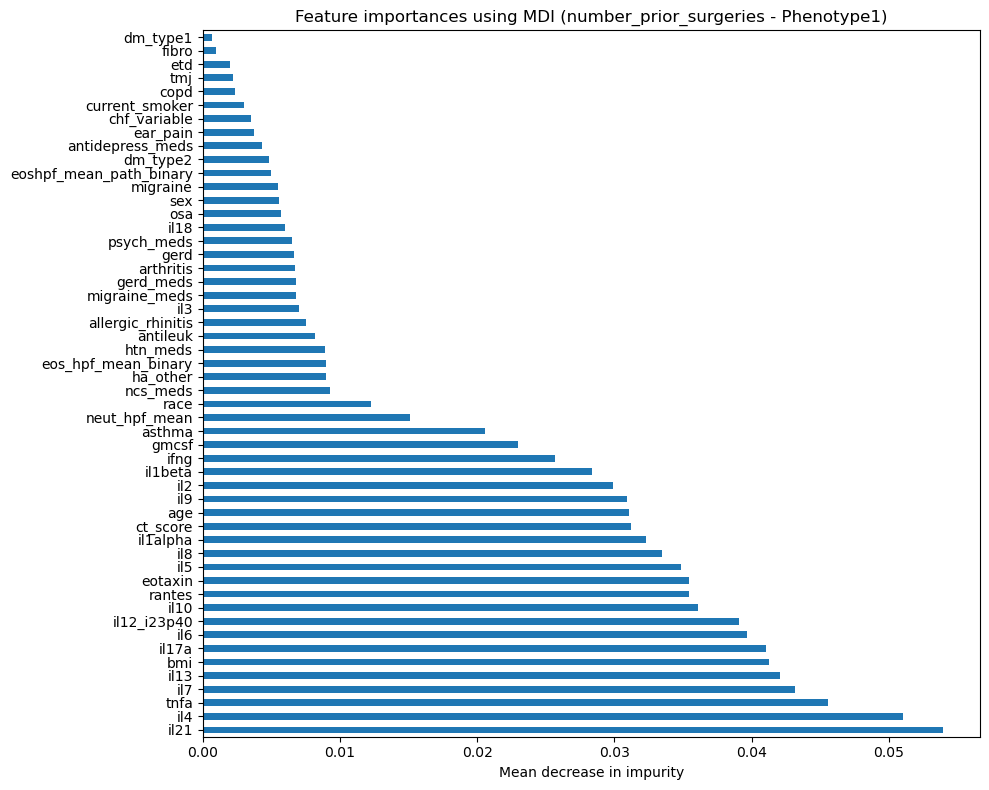

In [4]:
# 任务二：使用 IL1a 到 GMCSF 以及 age 作为特征，考虑对 number_prior_surgeries 的影响
data_clean = data.dropna(subset=['number_prior_surgeries'])
X_task2 = data_clean.drop(columns=['phenotype', 'prior_surgery', 'number_prior_surgeries'])
y_task2 = pd.cut(data_clean['number_prior_surgeries'], bins=[-1, 0, 1, np.inf], labels=[0, 1, 2])

# 填充缺失值：将每列缺失值替换为列平均值
X_task2 = X_task2.apply(lambda col: col.fillna(col.mean()), axis=0)

# 标准化数据
scaler = StandardScaler()
X_task2 = pd.DataFrame(scaler.fit_transform(X_task2), columns=X_task2.columns)

# 定义特征和目标变量
features_task2 = X_task2.columns.tolist()

# 分割数据集为训练集和测试集
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(
    X_task2, y_task2, random_state=42, test_size=0.3
)

# 初始化随机森林分类器
forest_reg = RandomForestClassifier(random_state=0)

# 训练模型
forest_reg.fit(X_train_task2, y_train_task2)

# 计算基于MDI的特征重要性
start_time = time.time()
importances_task2 = forest_reg.feature_importances_
std_task2 = np.std([tree.feature_importances_ for tree in forest_reg.estimators_], axis=0)
elapsed_time_task2 = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time_task2:.3f} seconds")

# 创建特征重要性DataFrame并排序（从高到低）
forest_importances_task2 = pd.DataFrame({'Importance': importances_task2, 'Std': std_task2}, index=features_task2)
forest_importances_task2 = forest_importances_task2.sort_values(by='Importance', ascending=False)

# 计算累积重要性
#forest_importances_task2['Cumulative_Importance'] = forest_importances_task2['Importance'].cumsum()
#forest_importances_task2['Cumulative_Percentage'] = (
#    forest_importances_task2['Cumulative_Importance'] / forest_importances_task2['Importance'].sum()
#)

print(forest_importances_task2['Importance'].sum())

# 筛选出累积重要性 <= 80% 的特征
selected_features_task2 = forest_importances_task2[forest_importances_task2['Importance'] >=0.04]

# 输出筛选后的特征
print("Selected features with importance >=0.04:")
print(selected_features_task2)

# 显示选取特征的数量
print(f"Number of selected features: {selected_features_task2.shape[0]}")

# 绘制横向的、经过排序的MDI特征重要性图
plt.figure(figsize=(10, 8))
forest_importances_task2['Importance'].plot.barh(ax=plt.gca(), legend=False)
plt.title("Feature importances using MDI (number_prior_surgeries - Phenotype1)")
plt.xlabel("Mean decrease in impurity")
plt.tight_layout()
plt.show()



Elapsed time to compute the importances: 0.263 seconds
Selected features with cumulative importance <= 80%:
                Importance       Std  Cumulative_Importance  \
current_smoker    0.004878  0.009756               0.004878   
race              0.002439  0.007317               0.007317   
age              -0.036585  0.056940              -0.029268   
bmi              -0.051220  0.033531              -0.080488   

                Cumulative_Percentage  
current_smoker              -0.036364  
race                        -0.054545  
age                          0.218182  
bmi                          0.600000  
Number of selected features: 4


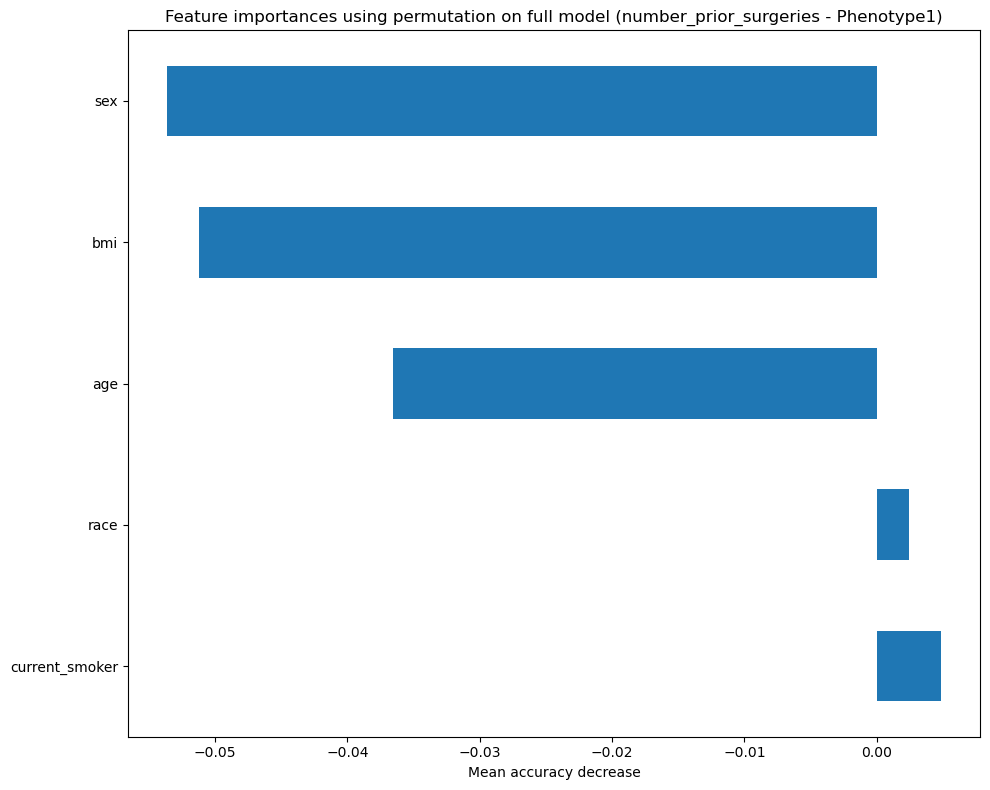

In [117]:
# 计算基于特征置换的重要性
start_time = time.time()
result_task2 = permutation_importance(
    forest_reg, X_test_task2, y_test_task2, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time_task2_perm = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time_task2_perm:.3f} seconds")

# 创建基于置换的特征重要性 DataFrame 并从高到低排序
perm_importances_task2 = pd.DataFrame({
    'Importance': result_task2.importances_mean,
    'Std': result_task2.importances_std
}, index=features_task2)
perm_importances_task2 = perm_importances_task2.sort_values(by='Importance', ascending=False)

# 计算累积重要性
perm_importances_task2['Cumulative_Importance'] = perm_importances_task2['Importance'].cumsum()
perm_importances_task2['Cumulative_Percentage'] = (
    perm_importances_task2['Cumulative_Importance'] / perm_importances_task2['Importance'].sum()
)

# 筛选出累积重要性 <= 80% 的特征
selected_features_task2 = perm_importances_task2[perm_importances_task2['Cumulative_Percentage'] <= 0.8]

# 输出筛选后的特征
print("Selected features with cumulative importance <= 80%:")
print(selected_features_task2)

# 显示选取特征的数量
print(f"Number of selected features: {selected_features_task2.shape[0]}")

# 绘制横向的、经过排序的基于置换的特征重要性图
plt.figure(figsize=(10, 8))
perm_importances_task2['Importance'].plot.barh(ax=plt.gca(), legend=False)
plt.title("Feature importances using permutation on full model (number_prior_surgeries - Phenotype1)")
plt.xlabel("Mean accuracy decrease")
plt.tight_layout()
plt.show()
